# LegPy for a beam of electrons

This notebook is intended to assist the user of LegPy in the simulation of an **electron beam**  

# LegPy

#### Fernando Arqueros, Jaime Rosado, Victor Moya


LegPy (Low energy gamma-ray simulation in Python) is a Monte Carlo simulation code for the transportion of gamma rays and electrons with energies below (or about) a few MeVs through any medium. In this notebook only electron beams are considered.

Several geometries are supported (cylinder, orthohedron and sphere). Electrons are produced as paralell beams or from isotropic sources with energies following several spectral distributions (monoenergetic, flat, exponential, etc.).

## Previous steps

Import modules

In [1]:
import LegPy as lpy
import numpy as np
import matplotlib.pyplot as plt

The user has to "construct" four objects that are the main ingredients of the MC simulation: 

- The composition of the medium and their physical properties at microscopic level.
- The geometry of the medium.
- The energy spectrum of the electron beam crossing the medium.
- The geometry of the beam.

Let's start.

## Construction of the medium I: Composition

The user has to give data on attenuation coefficients of the medium.

Two options named here **NIST** and **generic** are available. Select and run only the one you choose.




### NIST

Data from the National Institute of Standards and Technology of accurate CSDA ranges are available in the LegPy/electron_data folder. The user has to provide a medium name among them.

In [2]:
!ls LegPy/electron_data/*.txt

LegPy/electron_data/Al.txt     LegPy/electron_data/Muscle.txt
LegPy/electron_data/Au.txt     LegPy/electron_data/NaI.txt
LegPy/electron_data/Bone.txt   LegPy/electron_data/Pb.txt
LegPy/electron_data/CsI.txt    LegPy/electron_data/Si.txt
LegPy/electron_data/Ge.txt     LegPy/electron_data/Water.txt


Now you can construct the medium providing the following data:

- name: 'Al', 'Bone', 'Ge', 'NaI', 'Pb', 'Water'...
- density (g/cm^3): Optional. Default value is stored in file.

In [2]:
medium = lpy.Medium(name='water')
#medium = lpy.Medium(name='Pb')
#medium = lpy.Medium(name='Al', density=2.7)
#medium = lpy.Medium(name='bone_compact_ICRU', density=1.8)

### generic

In the absence of a data file, a generic procedure that evaluates the CSDA range from the Bethe-Bloch formula is used.

Now you can construct the medium providing the following data:

- name : only for id. purposes.
- density (g/cm^3).
- Pmol : molecular weight. Not needed if atomic masses are given.
- N : number of atoms of each type.
- Z : corresponding Z values.
- A : corresponding mass numbers.
- I (eV): corresponding Bethe parameters.
- e_E_min (MeV): minimun electron energy considered. Default to 0.01 MeV.
- e_E_max (MeV): maximum electron energy considered. Default to 1.25 MeV.

In [3]:
medium2 = lpy.Medium(name='water', density=1., Pmol=18.01, Z=[1,8], N=[2,1], A=[1,16], I=[19.2,95.], e_E_max = 20.)

## Plot CSDA range vs E (to be implemented)

Next you can plot the continuous slowing down approximation (CSDA) range vs energy of the medium. In the next command you have to provide: 

- energies : array of energies in MeV, better in log scale.
- l_style : line style for plotting ('', ':', etc.), defalut '' (solid line).
- units : 'cm' or 'gcm2'. Default is 'cm'. 

Several media can be plotted in the same figure so you can define several media above (with different names) and compare ranges (in the same units). Also you can compare NIST with generic models for the same medium.

This step is optional so you can skip it.

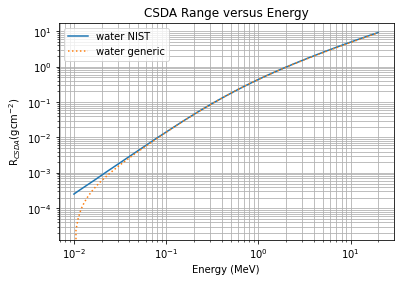

In [4]:
E1 = 0.01 # MeV
E2 = 20. # MeV
units = 'gcm2'
energy_range = np.logspace(np.log10(E1), np.log10(E2), num=150) # 150 points in a log-scale E(MeV) between E1 and E2
medium.plot_R(energies=energy_range, units = units)
medium2.plot_R(energies=energy_range, l_style=':', units = units)

## Construction of the medium II: Geometry

Several geometries are available.





### Cylinder





Cylinder oriented with its axis along the z axis and its base at z=0. You have to provide:
- z (cm): height.
- r or diam (cm): radius or diameter.

For this geometry, you may choose either cylindrical or cartesian voxelization of the energy deposit matrix. Cylindrical voxelization is appropriate for vertical parallel beams along the z axis and isotropic sources located at the z axis. In this case, you have to input the number of intervals along the coordinates r and z:

- n_r.
- n_z.

Cartesian voxelization can also be applied in any situation and medium geometry. Here, you have to provide:

- n_x.
- n_y.
- n_z.

Choose your option and construct the geometry.


In [5]:
geometry = lpy.Geometry(name='cylinder', z=.2, r=.1, n_z=50, n_r=1) # Cylindrical voxelization
#geometry = lpy.Geometry(name='cylinder', z=.3, r=.2, n_x=10, n_y=10, n_z=10) # Cartesian voxelization

### Orthohedron

Rectangular parallelepiped oriented with its longitudinal axes parallel to the x, y, z axes. The center of bottom side is assumed to be at the origin of coordinates. In this geometry, only the cartesian voxelization is supported. You have to provide the dimensions of the orthohedron and the number of intervals along each axis:

- x (cm).
- y (cm).
- z (cm).
- n_x.
- n_y.
- n_z.

In [6]:
geometry = lpy.Geometry(name='orthohedron', x=.1, y=.1, z=.1, n_x=10, n_y=10, n_z=10)

### Sphere





Sphere centered at (0,0,0). Both cartesian and spherical voxelization can be chosen. So you have to provide either: 

- r or diam (cm).
- n_r.

Or:

- r (cm).
- n_x.
- n_y.
- n_z.

In [7]:
#geometry = lpy.Geometry(name='sphere', r=.15, n_r=15) # Spherical voxelization
geometry = lpy.Geometry(name='sphere', diam=.1, n_x=10, n_y=10, n_z=10) # Cartesian voxelization

## Plot the geometry


Plot the geometry in the reference coordinate system. This step is optional.

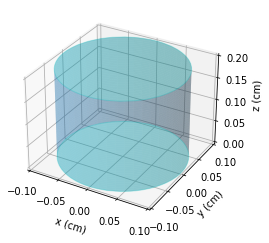

In [6]:
geometry.plot();

## Construction of the beam I:  Energy spectrum

The user has to select one of the following options:



### Monoenergetic



Input parameters:
- E (MeV).

In [9]:
spectrum = lpy.Spectrum(name = 'mono', E = 1.)

### Multi-monoenergetic




Input parameters:
- E_w: energies (MeV) and their corresponding weights in a numpy array (sum of weights must be 1).

In [10]:
E_w = np.array([[0.511, .80], [1.25, 0.20]]) # [[E1, w1], [E2, w2],....]
spectrum = lpy.Spectrum(name = 'multi_mono', E_w = E_w)



### Flat





Input parameters:
- E_min (MeV).
- E_max (MeV).

In [ ]:
spectrum = lpy.Spectrum(name = 'flat', E_min = 0.1, E_max = 1.0)



### Gaussian profile.





Input parameters: 
- E_mean (MeV).
- E_sigma (MeV).

Internal cut: 2 x E_mean > E > 0.

In [ ]:
spectrum = lpy.Spectrum(name = 'gaussian', E_mean = 0.5, E_sigma = 0.03)



### Exponential 





$I(E) \propto  e^{-E/E_{ch}}$, with E_min < E < E_max.

Input parameters: 

- E_min (MeV).
- E_max (MeV).
- E_ch (MeV).

In [7]:
spectrum = lpy.Spectrum(name = 'exponential', E_min = 0.1, E_max = 1.0, E_ch = 0.5)



### Reciprocal




$ I(E) \propto \frac{1}{E} $, with E_min < E < E_max.

Input parameters:
- E_min (MeV).
- E_max (MeV).

In [ ]:
spectrum = lpy.Spectrum(name = 'reciprocal', E_min = 0.01, E_max = 15.)



### From a file






The input file must have two columns:

Energy (MeV)   ------   Relative Intensity (au)

An example file is at LegPy/beam_spectra/example.txt. To use this file, just input file='example.txt'. If you want to use your own txt file, you should copy it to the same directory that this notebook is (or to load it to the current Colab session).

In [ ]:
spectrum = lpy.Spectrum(name = 'from_file', file = 'example.txt')

## Plot the spectrum







You can plot the energy spectrum of incident beam. Again, just to check it is OK.

A number of electrons are generated randomly following the requested spectrum in logaritmic scale in the range 0.001 - 20 MeV. You should input:
- n_part : number of particles, default to 10^5.
- n_bin : number of intervals, default to 50.

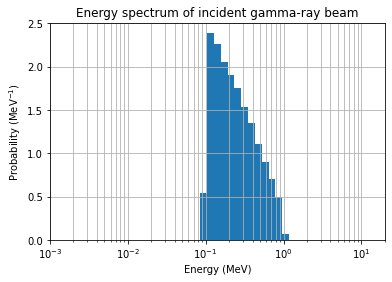

In [8]:
spectrum.plot(n_part = 100000, n_bin = 50)

## Construction of the beam II:  Geometry

The user has to select one of the following options:

NOTE: In order not to waste computing time the beam geometry has to be defined in such a way that all particles reach the medium.

### Parallel beam

Parallel beam with entrance plane perpendicular to z axis. In general not applicable for the sphere. 

Input parameters:

- particle = 'electron'
- theta (degrees) : zenith angle from z axis, default to 0.
- phi (degrees) : azimuth angle from x axis, default to 0.
- p_in (cm) : coordinates of the center of the beam cross section at the entrance plane in a numpy array, default to (0,0,0).
- diam (cm) : beam diameter, default to 0. (i.e., pencil beam).

In [9]:
beam = lpy.Beam(particle='electron', name = 'parallel')
#beam = lpy.Beam(name = 'parallel', theta = 15.0, phi = 30.0, p_in = np.array([0.1, -0.1, 0.0]))
#beam = lpy.Beam(name = 'parallel', theta = 19.0, phi = 30.0)

### Isotropic source / Divergent beam

Three options are available:

1) Isotropic **source** located **inside the medium**.

Input parameters:
- p_in: source location (cm). Default to (0,0,0)

In [13]:
x, y, z = 0.03, -0.03, 0.05 # cm 
beam = lpy.Beam(particle='electron', name = 'isotropic', p_in = np.array ([x, y, z]))
#beam = lpy.Beam(name = 'isotropic')

2) Isotropic **source** located **outside the medium**. Not applicable for the sphere. 

Input parameters:
- p_in(cm): coordinates of the source location below the XY plane (z<0). Default to x=y=0 (source on the z axis). Small (x,y) values are also possible but might increase the computing time. 
- size of the entrance aperture located on the XY plane, centered at (0,0):
    - if circular, provide diameter (cm)
    - if rectangular, provide x_ap, y_ap (cm) size

In [14]:
z = 1. # cm 
x, y = 0.02, -0.01 # cm
beam = lpy.Beam(particle='electron', name = 'isotropic', diam = .01, p_in = np.array ([x, y, -z]))
#beam = lpy.Beam(name = 'isotropic', x_ap = 1., y_ap = 0.5, p_in = np.array ([0., 0., -z]))

3) **Divergent beam** with the focus located on the z(<0) axis. Not applicable for the sphere. 

Input parameters:

- p_in(cm): coordinates of the focus location below the XY plane (z<0). Default to x=y=0 (source on the z axis). Small (x,y) values are also possible but might increase the computing time.      
- size of the field located on the XY plane, centered at (0,0):
    - if circular, provide diameter (cm)
    - if rectangular, provide x_ap, y_ap (cm) size

In [15]:
z = .025 # cm 
diam = .01 # cm
beam = lpy.Beam(particle='electron', name = 'isotropic', diam = diam, p_in = np.array ([0., 0., -z]))

### Plot a few tracks


Check a few (50) electron tracks into the medium with the geometry you have just constructed 

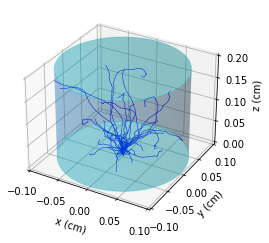

In [10]:
lpy.Plot_beam(medium, geometry, spectrum, beam)

## Monte Carlo Simulation


It transports the electron beam (defined by the objects "spectrum" and "beam") through the medium (defined by the objects "medium" and "geometry").

**Input**

Parameters to be provided: 

1.   **n_part**: number of beam electrons. Default is *n_part = 1000*.
2.   **E_cut** : Energy cut in MeV. Default is *E_cut = 0.01 MeV*.
3.   **n_ang**, **n_z** : Number of angular and z intervals to construct histograms. Default is 20 for both parameters.
4.   **e_length**, **e_K** : The electron transport is performed by steps of either same length (e_length) or same energy loss fraction (e_K). By default, e_length is obtained from the voxel size, but these parameters may also be specified, if desired. The parameter e_length is in $\mu$m.
5.   **tracks** : Plot tracks (not advised for > 100 particles). Default is *tracks = False*.

**Return** 

An object (dubbed **result**) containing the spatial distribution of deposited energy, the histogram of electron ranges and the angular histogram of backscattered electrons. Once this object is generated, this information can be plotted or stored in files (see examples below).

In [11]:
result = lpy.MC(medium, geometry, spectrum, beam, n_part = 100, n_z=50)


The simulation has ended

Computing time per beam particle =  9.09e-04 seconds



## Examples

In [1]:
import LegPy as lpy
import numpy as np
import matplotlib.pyplot as plt

### 1) Display of electron tracks (only) ###

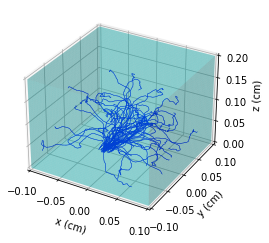

In [2]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='orthohedron', x =.2, y = 0.2, z=.2, n_x=30, n_y=30, n_z=100)
spectrum = lpy.Spectrum(name='mono', E = 1.)
beam = lpy.Beam(particle='electron', name='parallel', theta=30.0, phi=20.0, diam=.02, p_in=(-0.03, 0., 0.))
lpy.Plot_beam(medium, geometry, spectrum, beam, n_part=50)
#Alternative:
#result = lpy.MC(medium, geometry, spectrum, beam, n_part=50, tracks=True)

### 2) Electron range and backscattering studies ###

First, check the CSDA range for an appropriate choice of the size of the medium and the e_length (e_K) parameters   

In [3]:
E = 1.0 #MeV
spectrum = lpy.Spectrum(name='mono', E=E)
medium = lpy.Medium(name='Al') # NIST
e_data = medium.e_data
CSDA = np.interp(E, e_data.E_ref, e_data.R_ref) # cm
CSDAum = CSDA * 1.e4 # um
print('CSDA = ', round(CSDA, 3), 'cm')
#

CSDA =  0.205 cm


A step length of CSDA/100 (or e_K = 0.95) should be enough to get accurate results

In [4]:
e_length = CSDAum * 0.01 # um (1/100 of CSDA)
#e_K = 0.95

In [5]:
geometry = lpy.Geometry(name='cylinder', diam=.25, z=.25, n_x=30, n_y=30, n_z=100)
beam = lpy.Beam(particle = 'electron', name='parallel')
n_part = 5000
result = lpy.MC(medium, geometry, spectrum, beam, n_part=n_part, n_z=50, e_length=e_length)


The simulation has ended

Computing time per beam particle =  7.57e-03 seconds



Maximum depth (cm):  0.185
Fraction of backscattered electrons:  0.061


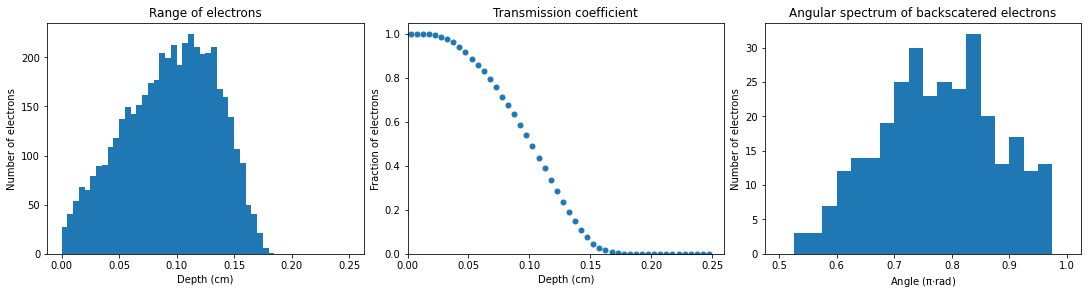

In [6]:
result.plot_hists()

#### 2.1) Electron range ####

Depending on the practical case, two different definitions of electron range R are used:

- The depth z of the electron at the end of its path. This definition is used for the first histogram of the above figure.
- The maximum depth reached by the electron. This definition is associated to the transmission curve obtained experimentally when the number of electrons traversing layers of several depths z are measured and is used for the second histogram of the above figure.

Differences between both ranges might be non-negligible in cases with strong backscattering.  

Both definitions of range can be computed and stored in a dataframe with three components: x = R(cm), y = number of electrons, z = fraction of electrons.

Check its shape

In [7]:
range_df = result.final_z()
#range_df = result.max_z()
range_df.head()

,z/cm,electrons,fraction
0,0.0025,27.0,0.994248
1,0.0075,41.0,0.985513
2,0.0125,54.0,0.974009
3,0.0175,68.0,0.959523
4,0.0225,65.0,0.945675


Plot of R distribution and the corresponding integral function of the electron fraction vs R in either definition. Similar to to the plots obtained above but you can personalized them.  

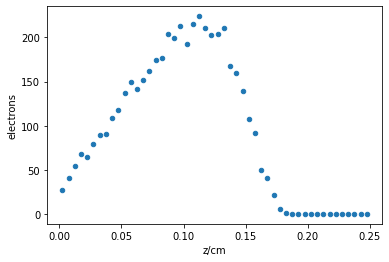

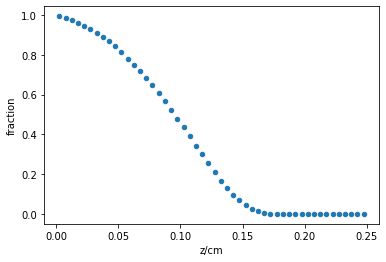

In [8]:
range_df.plot(kind='scatter', x=0, y=1);
range_df.plot(kind='scatter', x=0, y=2);

Calculation of the **extrapolated range** and other parameters 

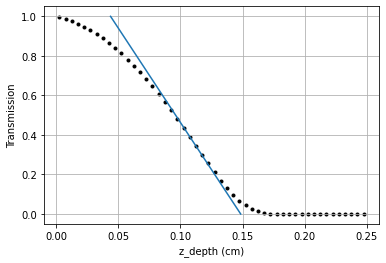

Extrapolated range (cm):  0.149
Distribution mode (cm):  0.112
Distribution average (cm):  0.094


In [9]:
ext_R, mode, av = lpy.ext_range(range_df)

This funcion is also incorporated in the result object. The range definition should be set to "final" (default) or "max".

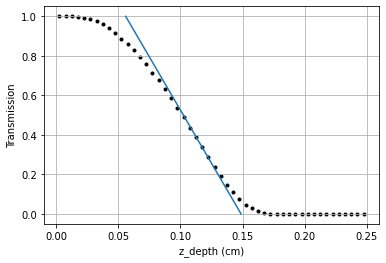

Extrapolated range (cm):  0.149
Distribution mode (cm):  0.117
Distribution average (cm):  0.102


In [10]:
ext_R, mode, av = result.ext_range(definition="max")

#### 2.1) Electron Backscattering ####

The angle distribution of backscattered electrons can be computed and stored in a dataframe.

In [11]:
back = result.backscattering()
back

,angle/rad,electrons,dn/dOmega
0,1.610066,0.0,0.000000
1,1.688606,3.0,0.001224
2,1.767146,3.0,0.001240
3,1.845686,7.0,0.002948
4,1.924226,12.0,0.005184
5,2.002765,14.0,0.006248
6,2.081305,14.0,0.006503
7,2.159845,19.0,0.009261
8,2.238385,25.0,0.012902
9,2.316925,30.0,0.016557


The backscattering coefficiente, b, is the fraction of backscattered electrons. 

In [12]:
b = back.sum()[1]/n_part
print('b = ', round(100.*b, 2), '%')

b =  6.12 %


Plot the angular distribution of backscattered electrons

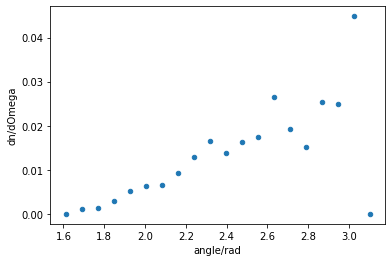

In [13]:
back.plot(kind='scatter', x=0, y=2);

### 3) Energy deposition ###

#### 3.1) Cylindrical symmetry   ####

In [14]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='cylinder', r =.2, z=.2, n_r=20, n_z=20)
spectrum = lpy.Spectrum(name='mono', E=1.)
beam = lpy.Beam(particle='electron', name='parallel', diam=0.02)
result = lpy.MC(medium, geometry, spectrum, beam, n_part=50000)


The simulation has ended

Computing time per beam particle =  1.63e-03 seconds



Not enough data to fill the histograms for projections of the E_dep matrix.


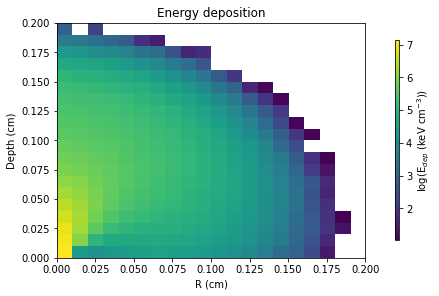

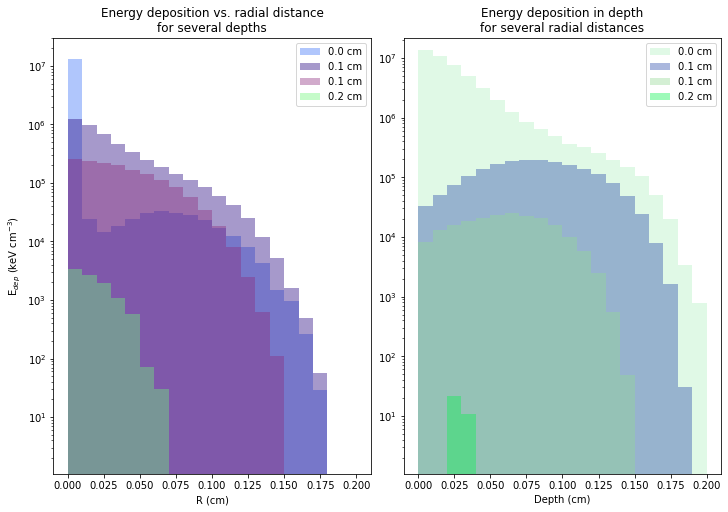

In [15]:
result.plot_Edep()

The spatial distribution of energy deposit can be stored in an excel file or a dataframe. Note that results are averaged over  axial angle

In [16]:
#result.Edep_to_excel("my_excel")
Edep_df = result.Edep_to_df()
Edep_df

r(cm),0.005,0.015,0.025,0.035,0.045,0.055,0.065,0.075,0.085,0.095,0.105,0.115,0.125,0.135,0.145,0.155,0.165,0.175,0.185,0.195
z(cm),,,,,,,,,,,,,,,,,,,,
0.005,1.334620e+07,2.398284e+04,14782.238295,18694.442963,23818.289507,30847.968573,32574.288428,31085.993599,28306.657461,23149.479453,17298.370609,12349.798654,8120.899136,4360.039013,1502.917234,949.498971,259.233278,28.692764,0.000000,0.0
0.015,1.058180e+07,1.016821e+06,102370.225663,55540.824642,53586.068049,52239.563465,51220.976736,48867.324657,42640.036476,35154.861985,26613.784610,18797.395460,12864.469515,6861.342783,3211.993853,1237.875971,393.441813,51.353576,0.000000,0.0
0.025,7.716229e+06,1.937072e+06,385106.069884,149042.488402,101859.230821,85645.138360,73635.369732,69206.984042,56108.969836,45766.426097,35637.654648,24181.234658,15945.715241,8892.808779,4332.282975,1285.172380,535.011887,92.110242,21.435904,0.0
0.035,4.984439e+06,2.125678e+06,688741.629200,294580.996316,174991.337690,127403.134084,106903.887357,87675.493248,70375.957995,58751.463865,44646.500429,29620.962487,18679.342161,11187.241179,5222.736896,1682.583547,558.395456,80.046340,10.717952,0.0
0.045,3.099874e+06,1.765299e+06,817608.355929,419159.636490,254798.897580,179936.134710,136122.566186,113611.186639,91157.343879,69527.014398,50794.651749,35407.699966,20851.498783,11670.215471,5587.054339,1987.218795,442.749128,74.014388,0.000000,0.0
0.055,1.935144e+06,1.345889e+06,774937.929076,468674.856706,302011.856233,214516.562676,166901.010089,130662.731822,100108.469024,76824.502006,56866.438289,39117.260721,23400.786416,12412.453555,5731.871334,1991.836699,405.612569,45.321625,0.000000,0.0
0.065,1.252851e+06,9.878941e+05,679840.248393,465632.130866,334638.544360,242098.899365,183930.602158,144996.800306,111034.871588,85528.539892,59476.613298,41654.698896,24804.445167,12089.609996,5263.521193,1616.335531,491.595469,56.652031,0.000000,0.0
0.075,8.518834e+05,7.182012e+05,555544.418030,427538.609425,329271.583883,250715.308253,197662.801705,152713.968692,117736.215522,88409.677543,61422.520667,39936.013876,22447.532445,10834.257654,4470.092022,1082.863079,126.568499,22.660812,0.000000,0.0
0.085,6.323219e+05,5.521071e+05,458974.644291,379170.720326,302746.790449,238581.159432,192281.219440,153659.622900,117892.919069,84597.843754,58695.504603,35837.249368,20590.735103,8650.476681,3220.536068,663.536925,84.897633,11.330406,0.000000,0.0


#### 3.2) Cartesian symmetry   ####

In [17]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='cylinder', r=0.2, z=0.2, n_x=40, n_y=40, n_z=20)
spectrum = lpy.Spectrum(name='mono', E=1.)
beam = lpy.Beam(particle='electron', name='parallel', diam=0.02)
result = lpy.MC(medium, geometry, spectrum, beam, n_part=50000)


The simulation has ended

Computing time per beam particle =  1.75e-03 seconds



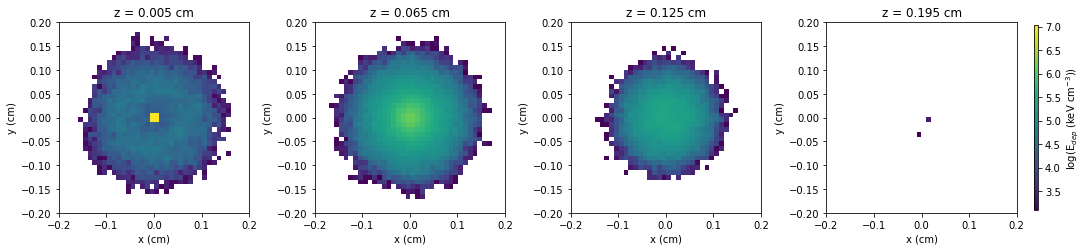

In [18]:
result.plot_Edep()

The spatial distribution of energy deposit is 3d. This cannot be stored in an excel file or a dataframe, but it is stored in a matrix within the result object generated by MC.

This matrix can also be stored in a binary file with extension .npy for later use (also available for the other geometries).

In [19]:
#result.Edep_to_npy("my_file") # the default name is the name of the medium

Total energy deposited in the medium

In [20]:
Vp = geometry.delta_v # pixel volume (cm^3)
Ed = result.Edep.sum() * Vp
print('total energy deposit =', round(Ed, 3), 'keV')

total energy deposit = 966.538 keV


Personalized plots of the spatial distribution of Edep can be done with this tool:  

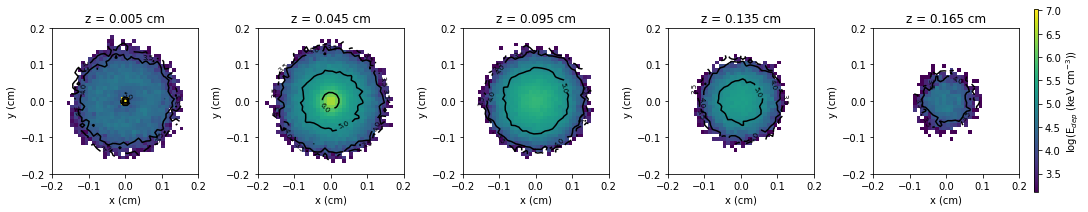

In [21]:
z_ind = [0, 4, 9, 13, 16] # index of z layers. 
prof_lev = [3.5, 4., 5., 6., 7.] # dosis levels (adjust according the color bar)
result.plot_Edep_layers(axis="z", indexes=z_ind, c_profiles=True, lev=prof_lev)

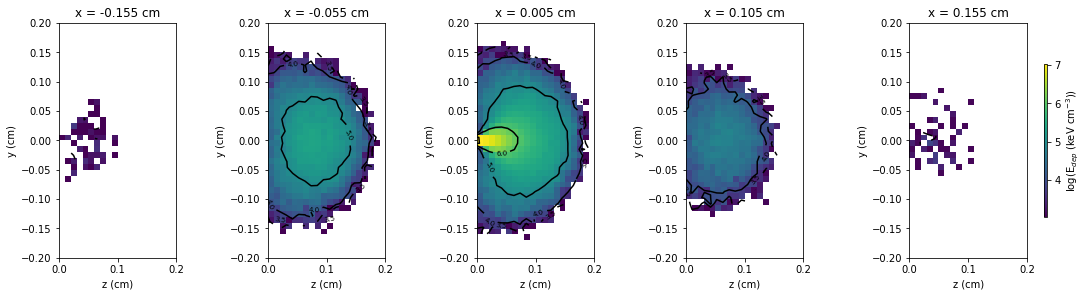

In [22]:
x_ind = [4, 14, 20, 30, 35] # index of z layers. 
prof_lev = [3.5, 4., 5., 6., 7.] # dosis levels (adjust according the color bar)
result.plot_Edep_layers(axis="x", indexes=x_ind, c_profiles=True, lev=prof_lev)

### 4) Backscattered energy ###

Similar to the above case (both cylndrical or cartesian voxelization) but forcing the electron beam to start its path in some point inside the medium     

#### 4.1) Cylindrical symmetry   ####

In [23]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='cylinder', r=.2, z=.30, n_r=20, n_z=30)
spectrum = lpy.Spectrum(name='mono', E=1.)
beam = lpy.Beam(particle='electron', name='parallel', diam=0.02, p_in=np.array([0., 0., 0.1]))
result = lpy.MC(medium, geometry, spectrum, beam, n_part=50000)


The simulation has ended

Computing time per beam particle =  1.66e-03 seconds



Not enough data to fill the histograms for projections of the E_dep matrix.


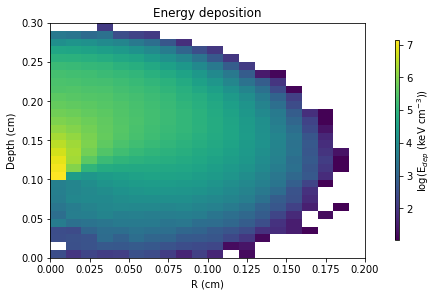

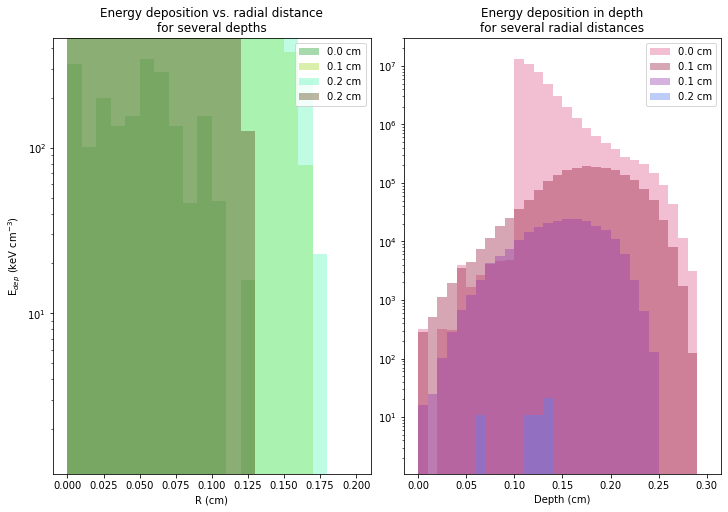

In [24]:
result.plot_Edep()

#### 4.2) Cartesian symmetry   ####

In [25]:
medium = lpy.Medium(name='Al')
geometry = lpy.Geometry(name='cylinder', r=0.2, z=0.3, n_x=40, n_y=40, n_z=30)
spectrum = lpy.Spectrum(name='mono', E=1.)
beam = lpy.Beam(particle='electron', name='parallel', diam=0.02, p_in=np.array([0., 0., 0.1]))
result = lpy.MC(medium, geometry, spectrum, beam, n_part=50000)


The simulation has ended

Computing time per beam particle =  1.81e-03 seconds



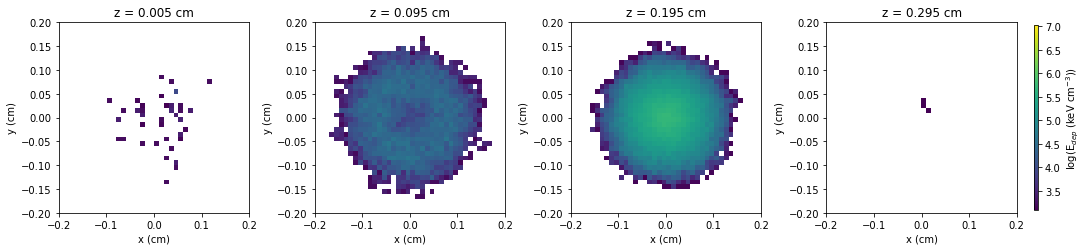

In [26]:
result.plot_Edep()

Personalized plots of the spatial distribution of Edep can be done with this tool:  

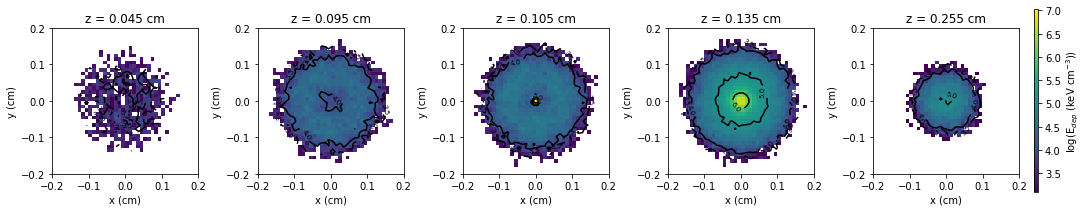

In [27]:
z_ind = [4, 9, 10, 13, 25] # index of z layers. 
prof_lev = [3.5, 4., 5., 6., 7.] # dosis levels (adjust according the color bar)
result.plot_Edep_layers(axis="z", indexes=z_ind, c_profiles=True, lev=prof_lev)

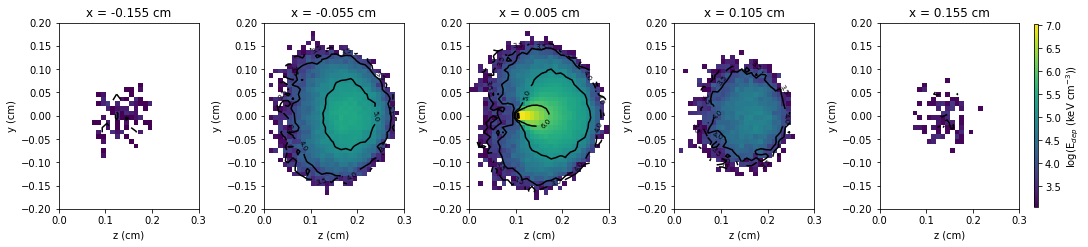

In [28]:
x_ind = [4, 14, 20, 30, 35] # index of z layers. 
prof_lev = [3.5, 4., 5., 6., 7.] # dosis levels (adjust according the color bar)
result.plot_Edep_layers(axis="x", indexes=x_ind, c_profiles=True, lev=prof_lev)

The energy deposited at z < z_in is the backscattered energy.

In [29]:
Vp = geometry.delta_v # pixel volume (cm^3)
Edep = result.Edep
Ed = Edep.sum() * Vp #total Edep
Eb = Edep[:, :, 0:10].sum() * Vp #back Edep
Ef = Edep[:, :, 10:30].sum() * Vp #for Edep

print('Fraction of backsacttered energy =', round(100. * Eb / Ed, 2), '%')

Fraction of backsacttered energy = 2.88 %
